# Making plots look the way you want 

yt already does a lot to give you a publication-ready figure, but sometimes you have to make some adjustments to the default figures. This notebook will walk you through some common changes you may need to make. 

first, load a dataset (feel free to replace with any dataset you like, but some of the operations in this notebook will be more obvious for datasets with more asymmetries)

In [1]:
import yt 

# ds = yt.load_sample("Enzo_64")
# or 
ds = yt.load("Enzo_64/DD0043/data0043")

yt : [INFO     ] 2025-07-11 16:57:34,489 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2025-07-11 16:57:34,490 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-11 16:57:34,490 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-11 16:57:34,491 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-11 16:57:34,491 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-11 16:57:34,492 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2025-07-11 16:57:34,492 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-11 16:57:34,492 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-11 16:57:34,493 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-11 16:57:34,493 Parameters: hubble_constant           = 0.71


## Controlling axes ranges with the `origin` keyword

Goal: get some practice with the `origin` keyword. 

First, create a Slice or Projection plot with defaults:

Parsing Hierarchy : 100%|██████████████████| 752/752 [00:00<00:00, 16478.07it/s]
yt : [INFO     ] 2025-07-11 16:57:34,598 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-11 16:57:36,197 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:36,198 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:36,200 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:36,201 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:36,203 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



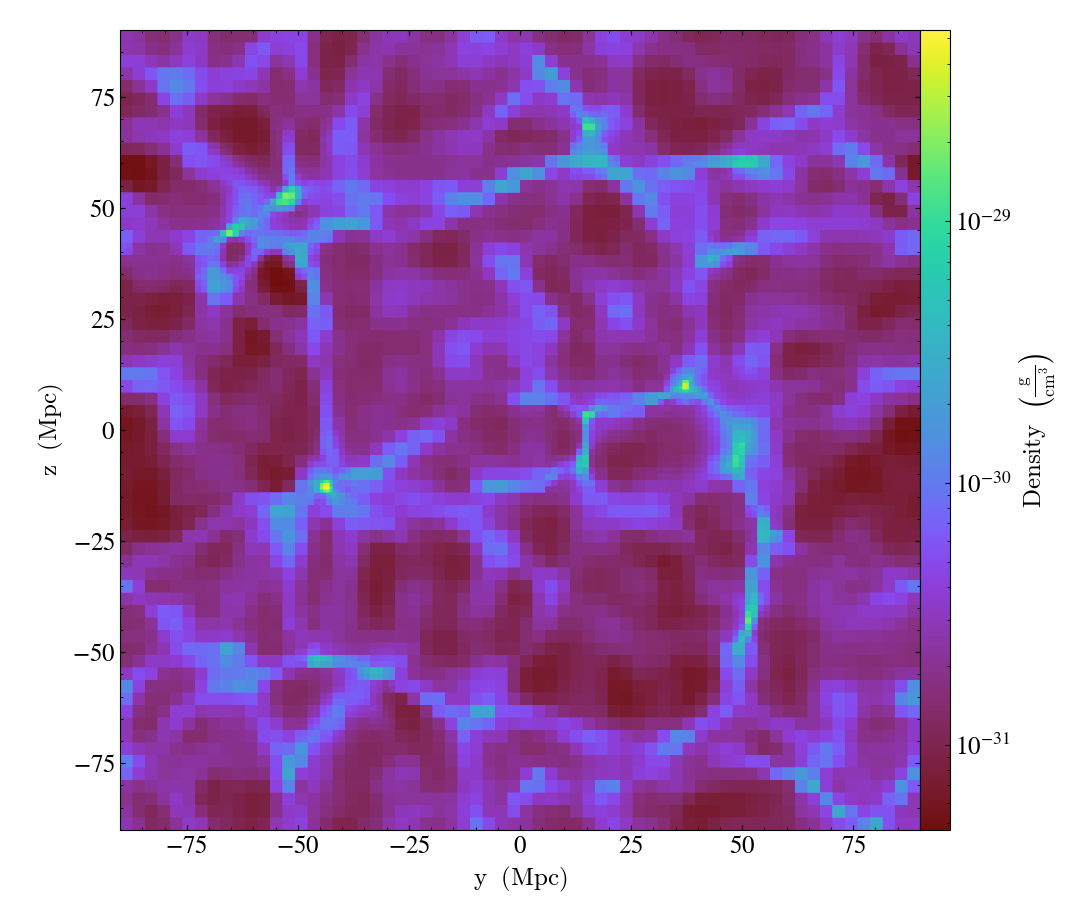

In [2]:
# create a Slice or Projection plot with defaults
yt.SlicePlot(ds, 'x', ('gas', 'density'))

compare the axes' ranges on the plot to dataset domain limits:

In [3]:
ds.domain_left_edge.to('Mpc'), ds.domain_right_edge.to('Mpc')

(unyt_array([0., 0., 0.], 'Mpc'),
 unyt_array([180.03089126, 180.03089126, 180.03089126], 'Mpc'))

now, use the origin keyword argument to make the axes' ranges match 
the domain limits (check the docstring for options for the origin
keyword

yt : [INFO     ] 2025-07-11 16:57:37,249 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,253 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,263 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,265 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,270 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



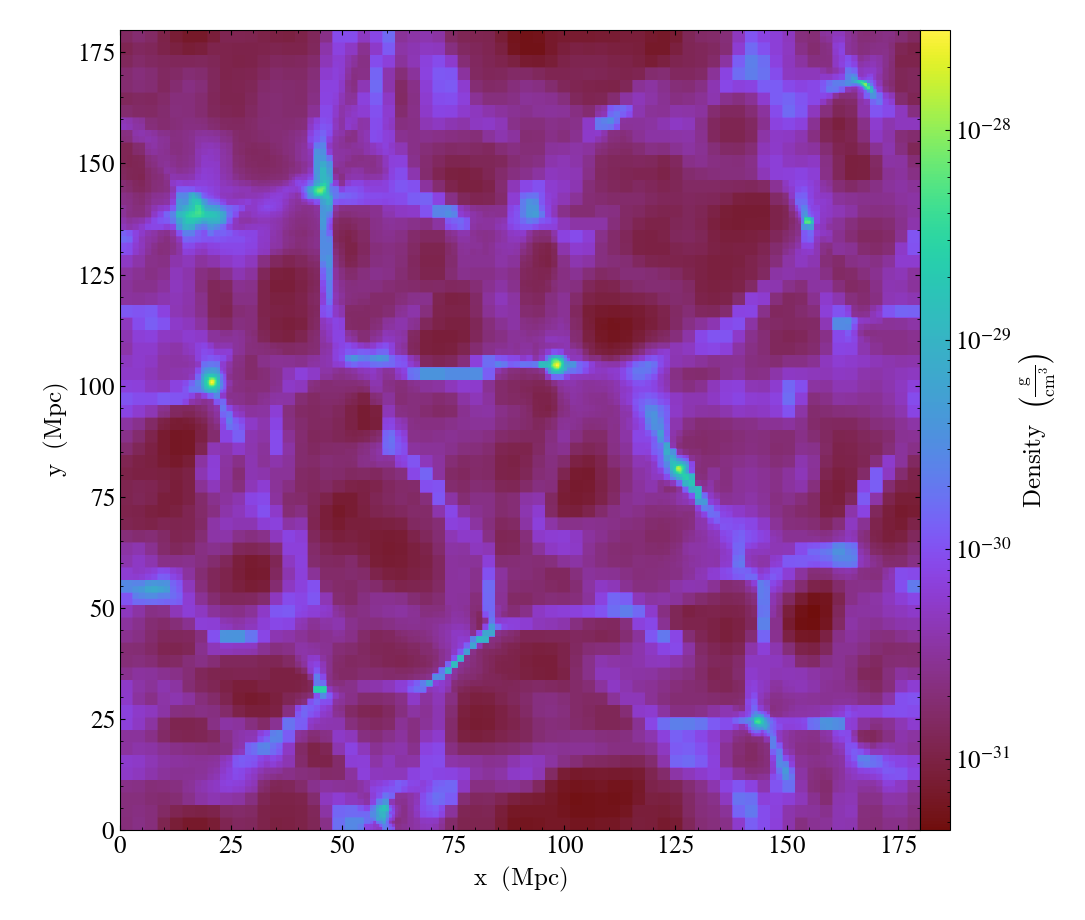

In [4]:
yt.SlicePlot(ds, 'z', ('gas', 'density'), origin='native')

finally, use the origin keyword argument to have (0, 0) in the upper irght hand corner of the plot:

yt : [INFO     ] 2025-07-11 16:57:37,932 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,933 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,935 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,936 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-11 16:57:37,937 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



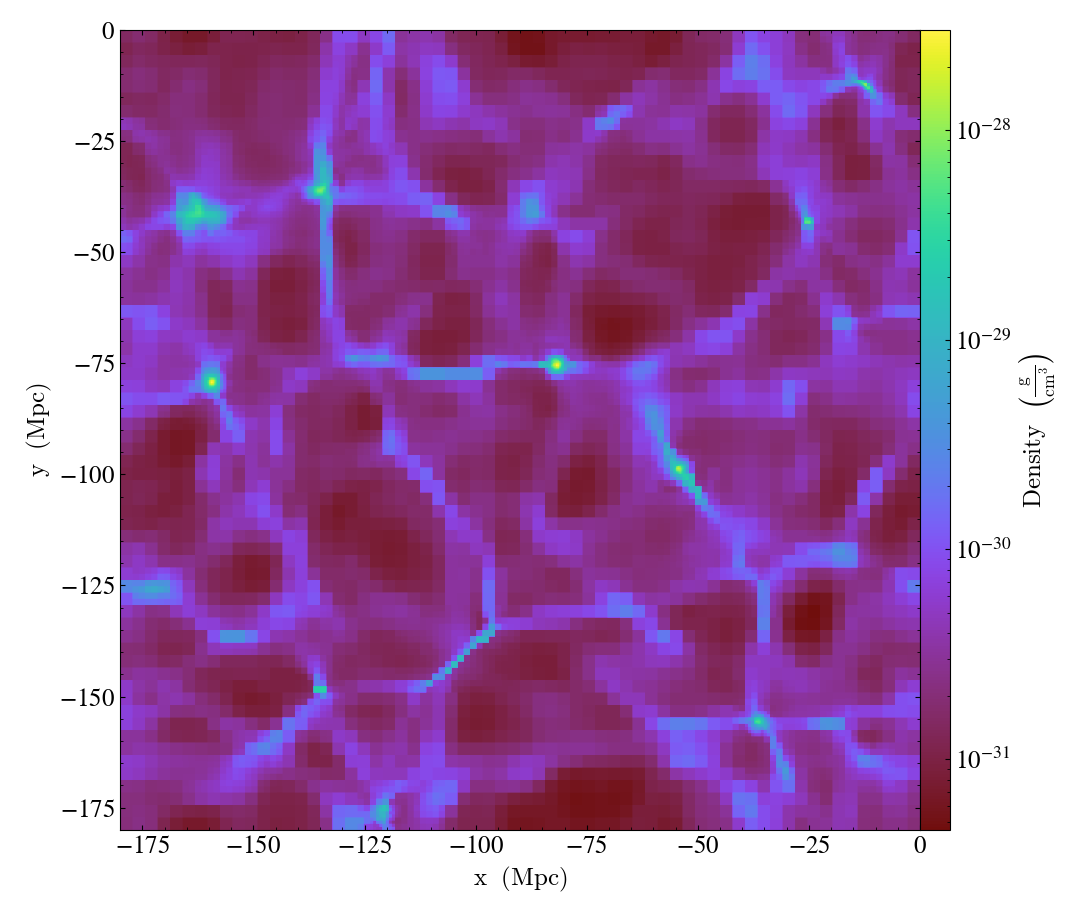

In [5]:
yt.SlicePlot(ds, 'z', 
             ('gas', 'density'), 
             origin=('upper', 'right', 'domain'))

## arg, I just want to switch the x and y axes... 

try the `.swap_axes()` callback. Easier to see in datasets with more asymmetry, e.g:

yt : [INFO     ] 2025-07-11 16:58:06,710 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/GalaxyClusterMerger/fiducial_1to3_b0.273d_hdf5_plt_cnt_0175'
yt : [INFO     ] 2025-07-11 16:58:06,784 Parameters: current_time              = 1.1047290781443734e+17
yt : [INFO     ] 2025-07-11 16:58:06,784 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-07-11 16:58:06,785 Parameters: domain_left_edge          = [-2.2e+25 -2.2e+25 -2.2e+25]
yt : [INFO     ] 2025-07-11 16:58:06,785 Parameters: domain_right_edge         = [2.2e+25 2.2e+25 2.2e+25]
yt : [INFO     ] 2025-07-11 16:58:06,786 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-07-11 16:58:10,393 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:10,394 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:10,396 xlim = -22000000000000000704643072.000000 22000000000000


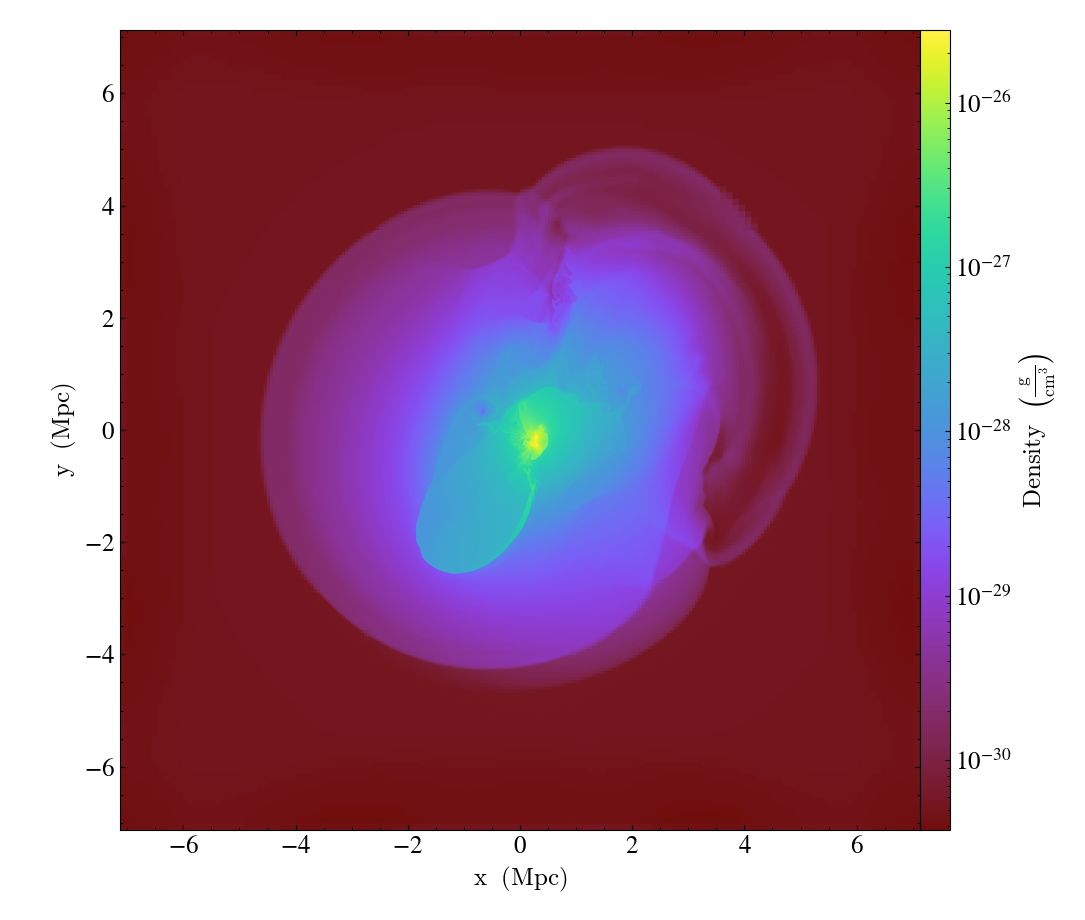

In [15]:
ds = yt.load_sample("GalaxyClusterMerger")

yt.SlicePlot(ds, 'z', ('gas', 'density'))

yt : [INFO     ] 2025-07-11 16:58:11,104 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,105 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,107 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,107 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,108 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



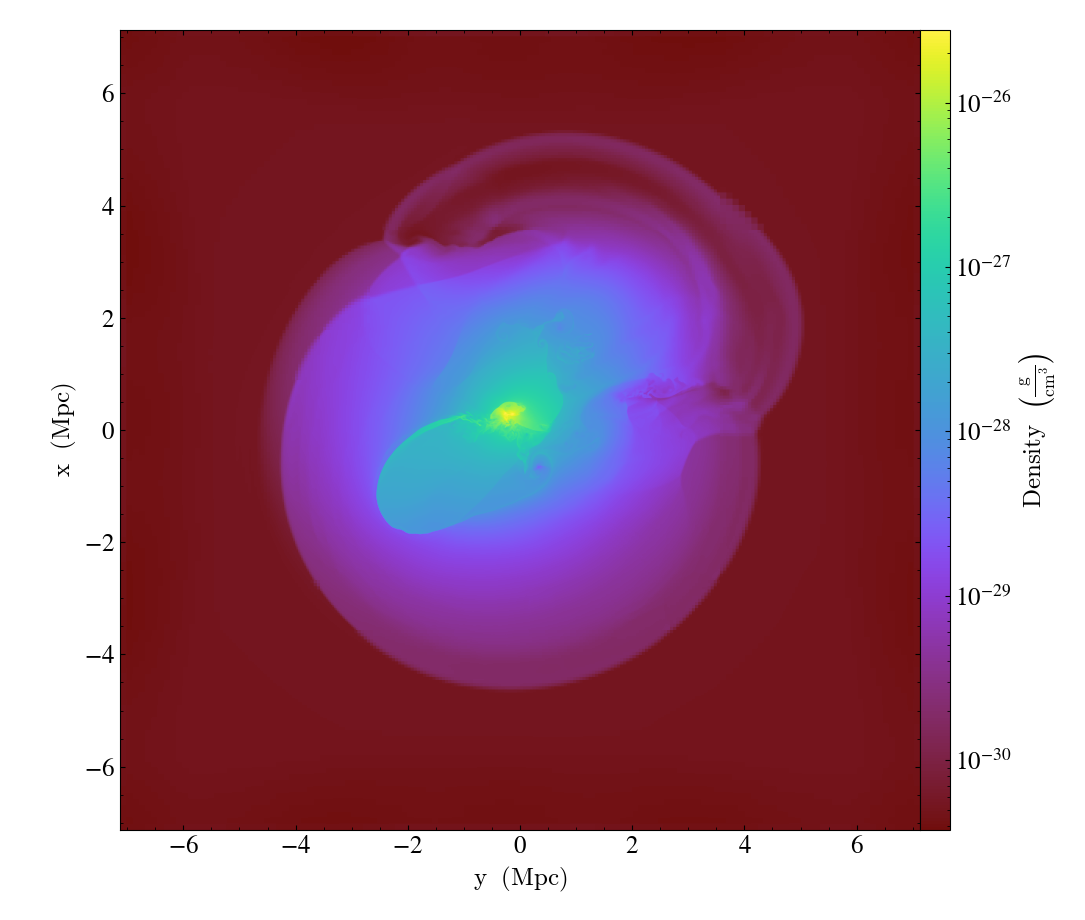

In [16]:
# write code to swap axes on a plot
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.swap_axes()
slc.show()

## wait, I actually want the mirror image 

`.flip_horizontal()` or `.flip_vertical()`!

yt : [INFO     ] 2025-07-11 16:58:11,856 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,857 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,860 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,860 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:58:11,861 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



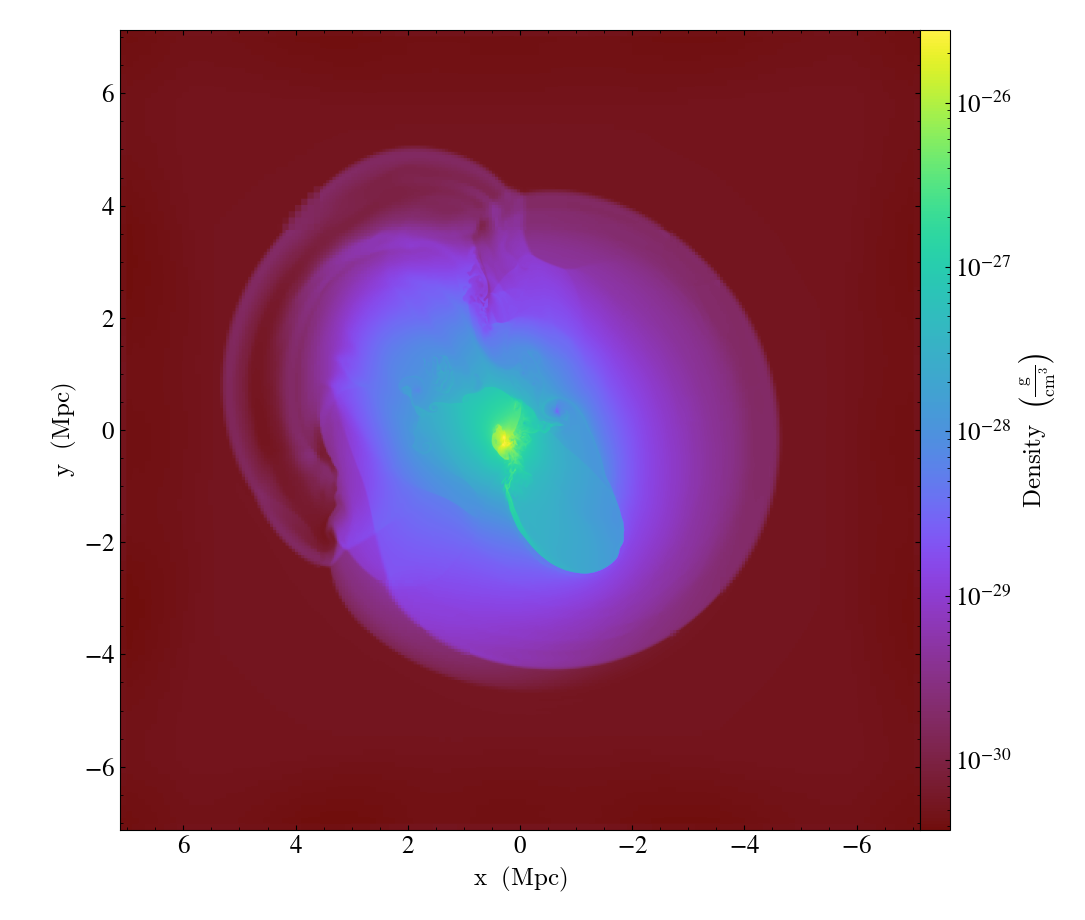

In [17]:
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.flip_horizontal()

## flip and swap? 

Does it work? Give it a try (does the order matter?)

yt : [INFO     ] 2025-07-11 16:57:45,828 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:45,828 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:45,831 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:45,831 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:45,832 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



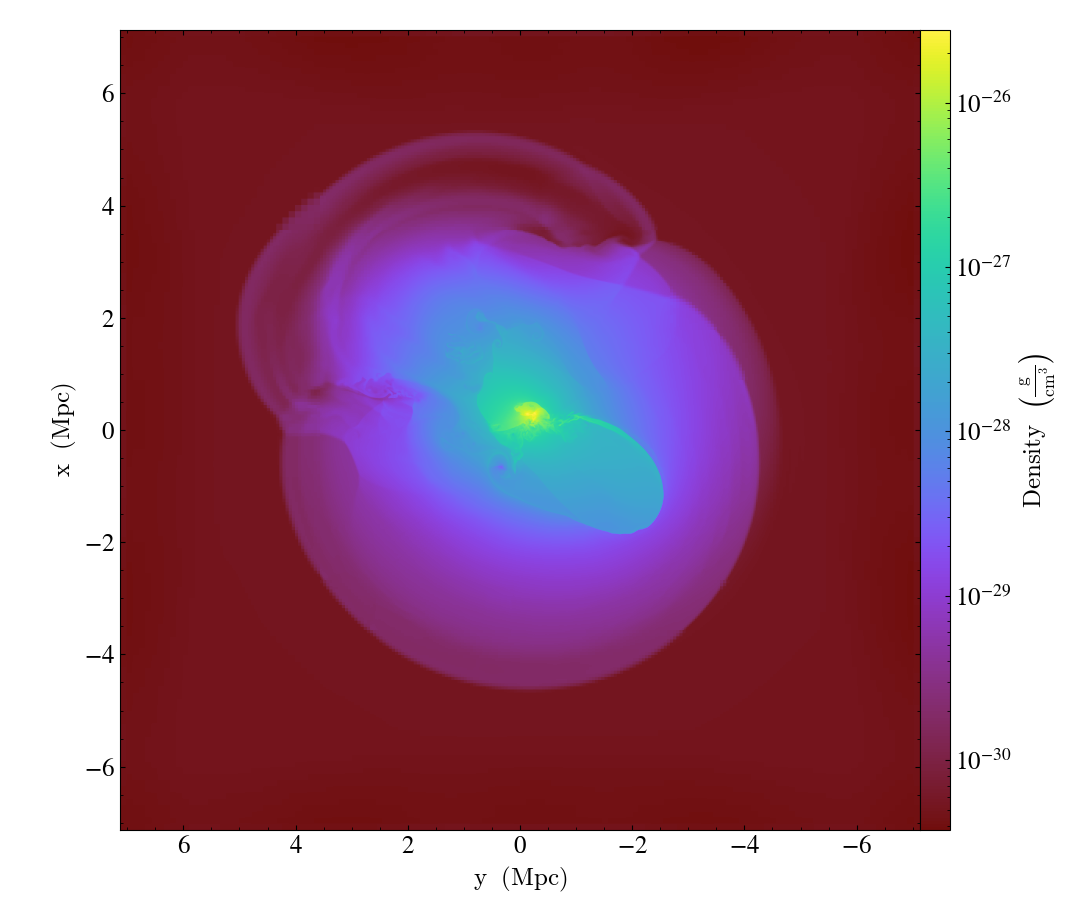

In [9]:
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.flip_horizontal()
slc.swap_axes()

yt : [INFO     ] 2025-07-11 16:57:46,575 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:46,576 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:46,578 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:46,578 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:46,579 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



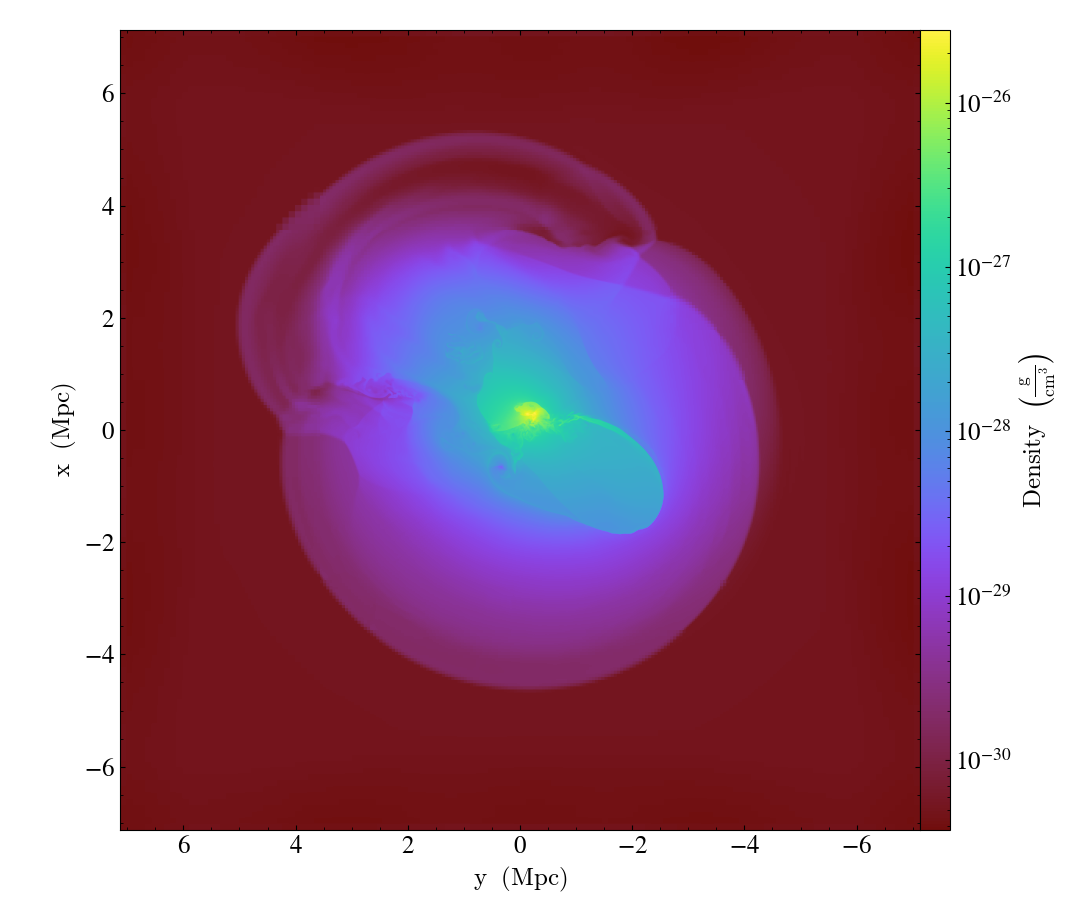

In [10]:
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))
slc.swap_axes()
slc.flip_horizontal()
slc

## font sizes, plot sizes and more

create a slice (or other plot)

In [11]:
slc = yt.SlicePlot(ds, 'z', ('gas', 'density'))

yt : [INFO     ] 2025-07-11 16:57:47,333 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:47,333 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:47,335 xlim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:47,336 ylim = -22000000000000000704643072.000000 22000000000000000704643072.000000
yt : [INFO     ] 2025-07-11 16:57:47,337 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


start typing `slc.set` and hit tab to see a bunch of options:

particularly useful ones:

Change the units displayed on the x and y axes to nanometers:


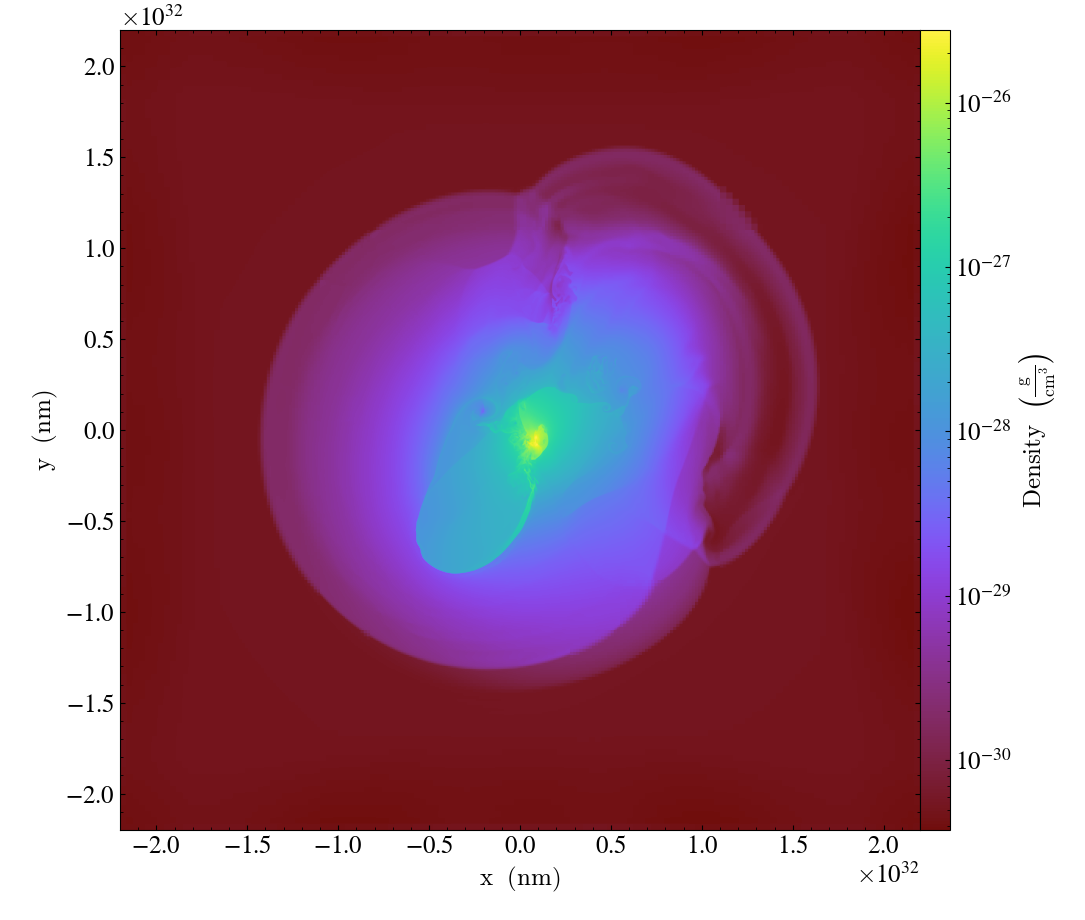

In [12]:
slc.set_axes_unit('nm')
slc

how about the color map units? change those to micrgrams per megameter$^3$ (that's a nice density unit)


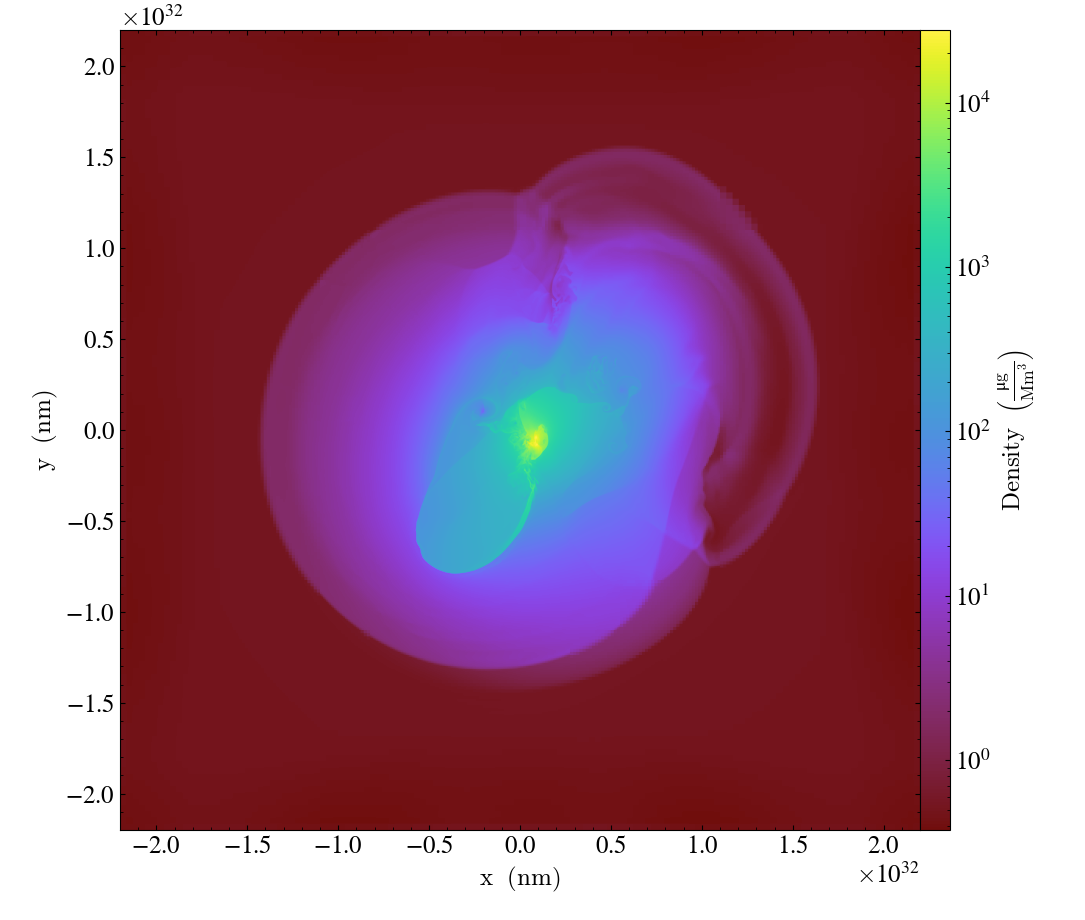

In [13]:
slc.set_unit(('gas', 'density'), 'ug / Mm**3')


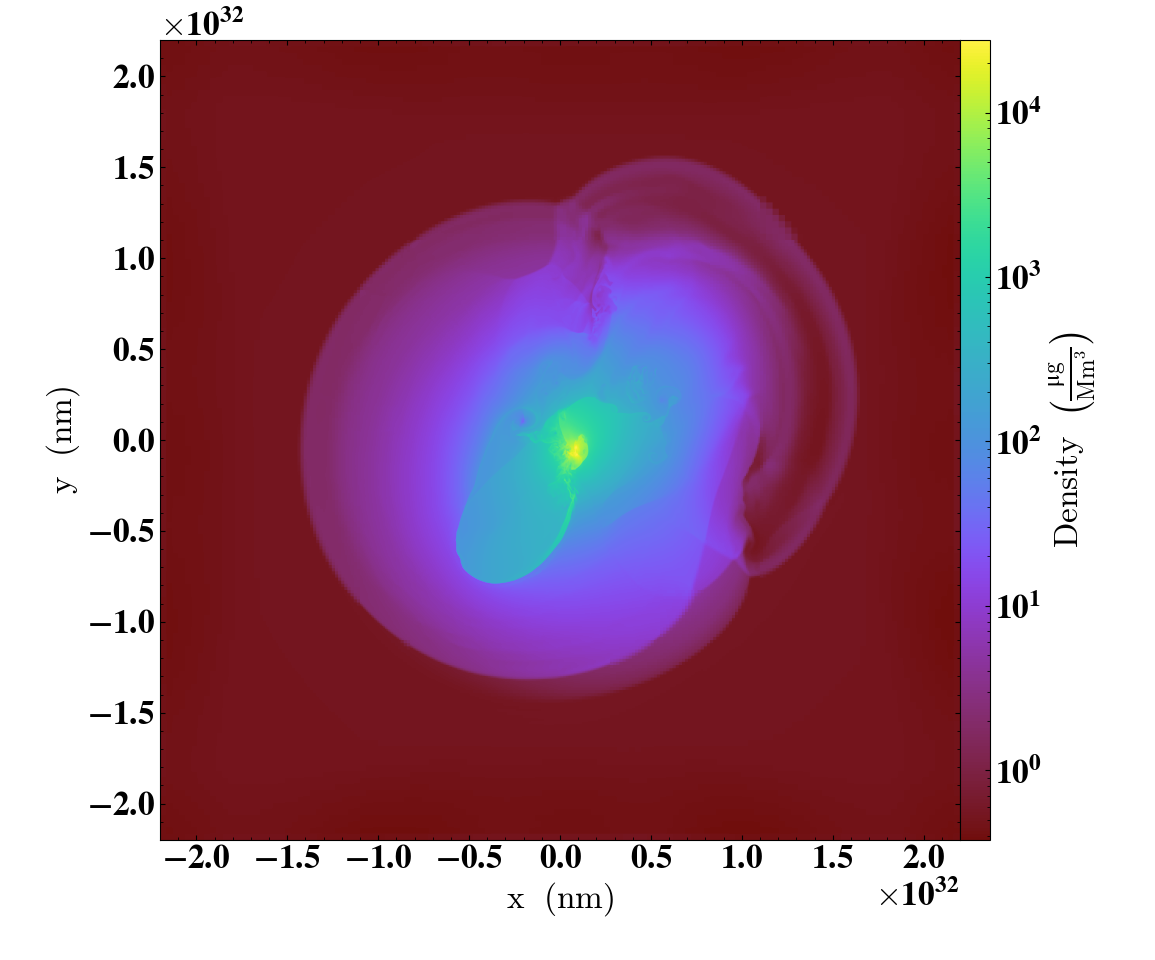

In [14]:
slc.set_font({"weight": "bold", "size": 24})
slc.show()


finally, when saving figures (especially for publications and presentations) it's often helpful to adjust the size of the figure:


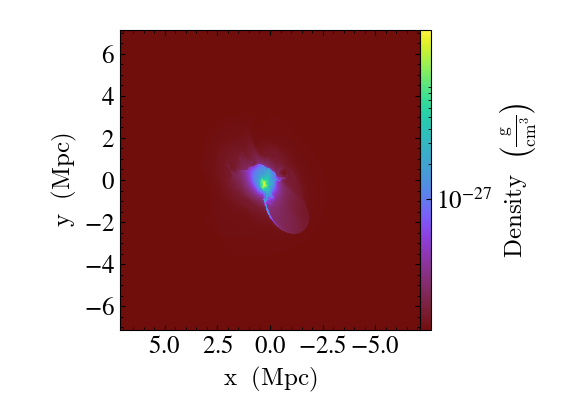

In [22]:
slc.set_figure_size(3) 
slc.show()